# linear_regression 함수 생성 및 cars 프로젝트

- toc:true
- branch: master
- badges: true
- comments: true
- author: 





## 7_1_linear_regression

In [ ]:
import tensorflow as tf

`Q`  linear_regression 함수를 생성하시오
- x가 5, 7일 때 y를 예측하시오

In [ ]:
def linear_regression_1():
  x = [1, 2, 3]
  y = [1, 2, 3]

  w = tf.Variable(5.0)                        # tersorflow에서 변수설정 방법
  b = tf.Variable(-3.0)

  optimizer = tf.keras.optimizers.SGD(0.1)    # 6_1에서 w값을 점차 줄여주는 값 0.1 역할을 함.

  for i in range(10):
    with tf.GradientTape() as tape:           # GradientTape => 자동미분 함수 
      hx = w * x + b
      loss = tf.reduce_mean((hx - y) ** 2)    # cost 함수를 loss로 표현

    gradient = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient, [w, b]))

    print(i, loss.numpy())
  print()

  print((w * [5, 7] + b).numpy())
    
    

In [ ]:
linear_regression_1()

0 35.666668
1 2.5718524
2 2.0746005
3 1.9715753
4 1.8778709
5 1.7886696
6 1.7037061
7 1.622779
8 1.5456957
9 1.4722743

[ 8.750337 13.501096]


`Q` predict 함수와 mean_square_error 함수를 생성한 후 linear_regression 함수를 다시 생성하시오

In [ ]:
def linear_regression_2():
  def predict(x, w, b):
    return w * x + b

  def mean_square_error(y, p):
    return tf.reduce_mean((p - y) ** 2)

  x = [1, 2, 3]
  y = [1, 2, 3]

  w = tf.Variable(tf.random.uniform([1]))     # w, b값을 랜덤으로 주는 함수식
  b = tf.Variable(tf.random.uniform([1])) 

  optimizer = tf.keras.optimizers.SGD(0.1)

  for i in range(10):
    with tf.GradientTape() as tape:
      hx = predict(x, w, b)
      loss = mean_square_error(y, hx)

    gradient = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient, [w, b]))

    print(i, loss.numpy())
  
  print()


In [ ]:
linear_regression_2()

0 1.7877704
1 0.092918254
2 0.069273576
3 0.06575331
4 0.06262723
5 0.059652388
6 0.056818843
7 0.05411992
8 0.051549185
9 0.049100544



## 7_2_linear_regression_cars

`Q` cars.csv 파일을 읽어서 x, y를 반환하는 함수를 만드시오

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
def make_xy():
  cars = pd.read_csv('/content/cars.csv', index_col=0)

  x = cars.values[:, 0]
  y = cars.values[:, 1]

  return x, y

In [ ]:
def linear_regression_cars():
  def predict(x, w, b):
    return w * x + b

  def mean_square_error(y, p):
    return tf.reduce_mean((p - y) ** 2)

  x, y = make_xy()                              # x, y를 make_xy()에서 정의한 x, y로 설정.

  w = tf.Variable(tf.random.uniform([1]))    
  b = tf.Variable(tf.random.uniform([1])) 

  optimizer = tf.keras.optimizers.SGD(0.001)    

  for i in range(10):
    with tf.GradientTape() as tape:
      hx = predict(x, w, b)
      loss = mean_square_error(y, hx)

    gradient = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient, [w, b]))

    print(i, loss.numpy())                        # 데이터가 안좋기 때문에 loss값이 나쁠 수 밖에 없음. 
  
  print()

In [ ]:
linear_regression_cars()

0 1966.6914
1 637.76654
2 345.33554
3 280.9769
4 266.80377
5 263.67358
6 262.97333
7 262.80774
8 262.7598
9 262.73776



`Q` 앞에서 학습한 모델의 회귀선을 그려보시오

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def linear_regression_cars():
  def predict(x, w, b):
    return w * x + b

  def mean_square_error(y, p):
    return tf.reduce_mean((p - y) ** 2)

  x, y = make_xy()                              # x, y를 make_xy()에서 정의한 x, y로 설정.

  w = tf.Variable(tf.random.uniform([1]))    
  b = tf.Variable(tf.random.uniform([1])) 

  optimizer = tf.keras.optimizers.SGD(0.001)    

  for i in range(10):
    with tf.GradientTape() as tape:
      hx = predict(x, w, b)
      loss = mean_square_error(y, hx)

    gradient = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradient, [w, b]))

  plt.plot(x, y, 'ro')          # x의 범위가 대충 0~30임을 확인

  s = predict([0], w, b)        # x=0 일때 y값
  f = predict([30], w, b)       # x=30 일때 y값

  plt.plot([0, 30], [s.numpy(), f.numpy()], 'b')

  plt.show()



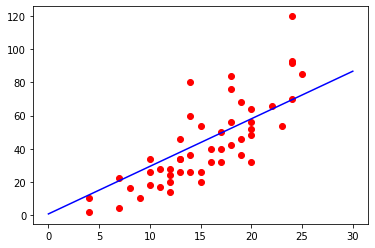

In [ ]:
linear_regression_cars()